In [ ]:
!pip install feature-engine xgboost scikit-learn --upgrade

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [340]:
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (1)\Credit Score Classification Dataset.csv' , encoding="utf-8")
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [342]:
null_counts = df.isnull().sum()
print("Null values per column:")
print(null_counts)

total_nulls = df.isnull().sum().sum()
print(f"\nTotal null values in DataFrame: {total_nulls}")

Null values per column:
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

Total null values in DataFrame: 0


In [344]:
# For categorical/object columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Unique categories per column:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {unique_count}")
    print("Unique values:", df[col].unique())

# For numerical columns (if you want to see unique values there too)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nUnique values in numerical columns:")
for col in numerical_cols:
    unique_count = df[col].nunique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {unique_count}")
    if unique_count <= 10:  # Print values only if there are few unique numbers
        print("Unique values:", df[col].unique())

Unique categories per column:

Column: Gender
Number of unique values: 2
Unique values: ['Female' 'Male']

Column: Education
Number of unique values: 5
Unique values: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Column: Marital Status
Number of unique values: 2
Unique values: ['Single' 'Married']

Column: Home Ownership
Number of unique values: 2
Unique values: ['Rented' 'Owned']

Column: Credit Score
Number of unique values: 3
Unique values: ['High' 'Average' 'Low']

Unique values in numerical columns:

Column: Age
Number of unique values: 29

Column: Income
Number of unique values: 52

Column: Number of Children
Number of unique values: 4
Unique values: [0 2 1 3]


In [346]:
df.shape

(164, 8)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [350]:
features = ['Age','Gender','Income','Education','Martial Status','Number of Children','Home Ownership']

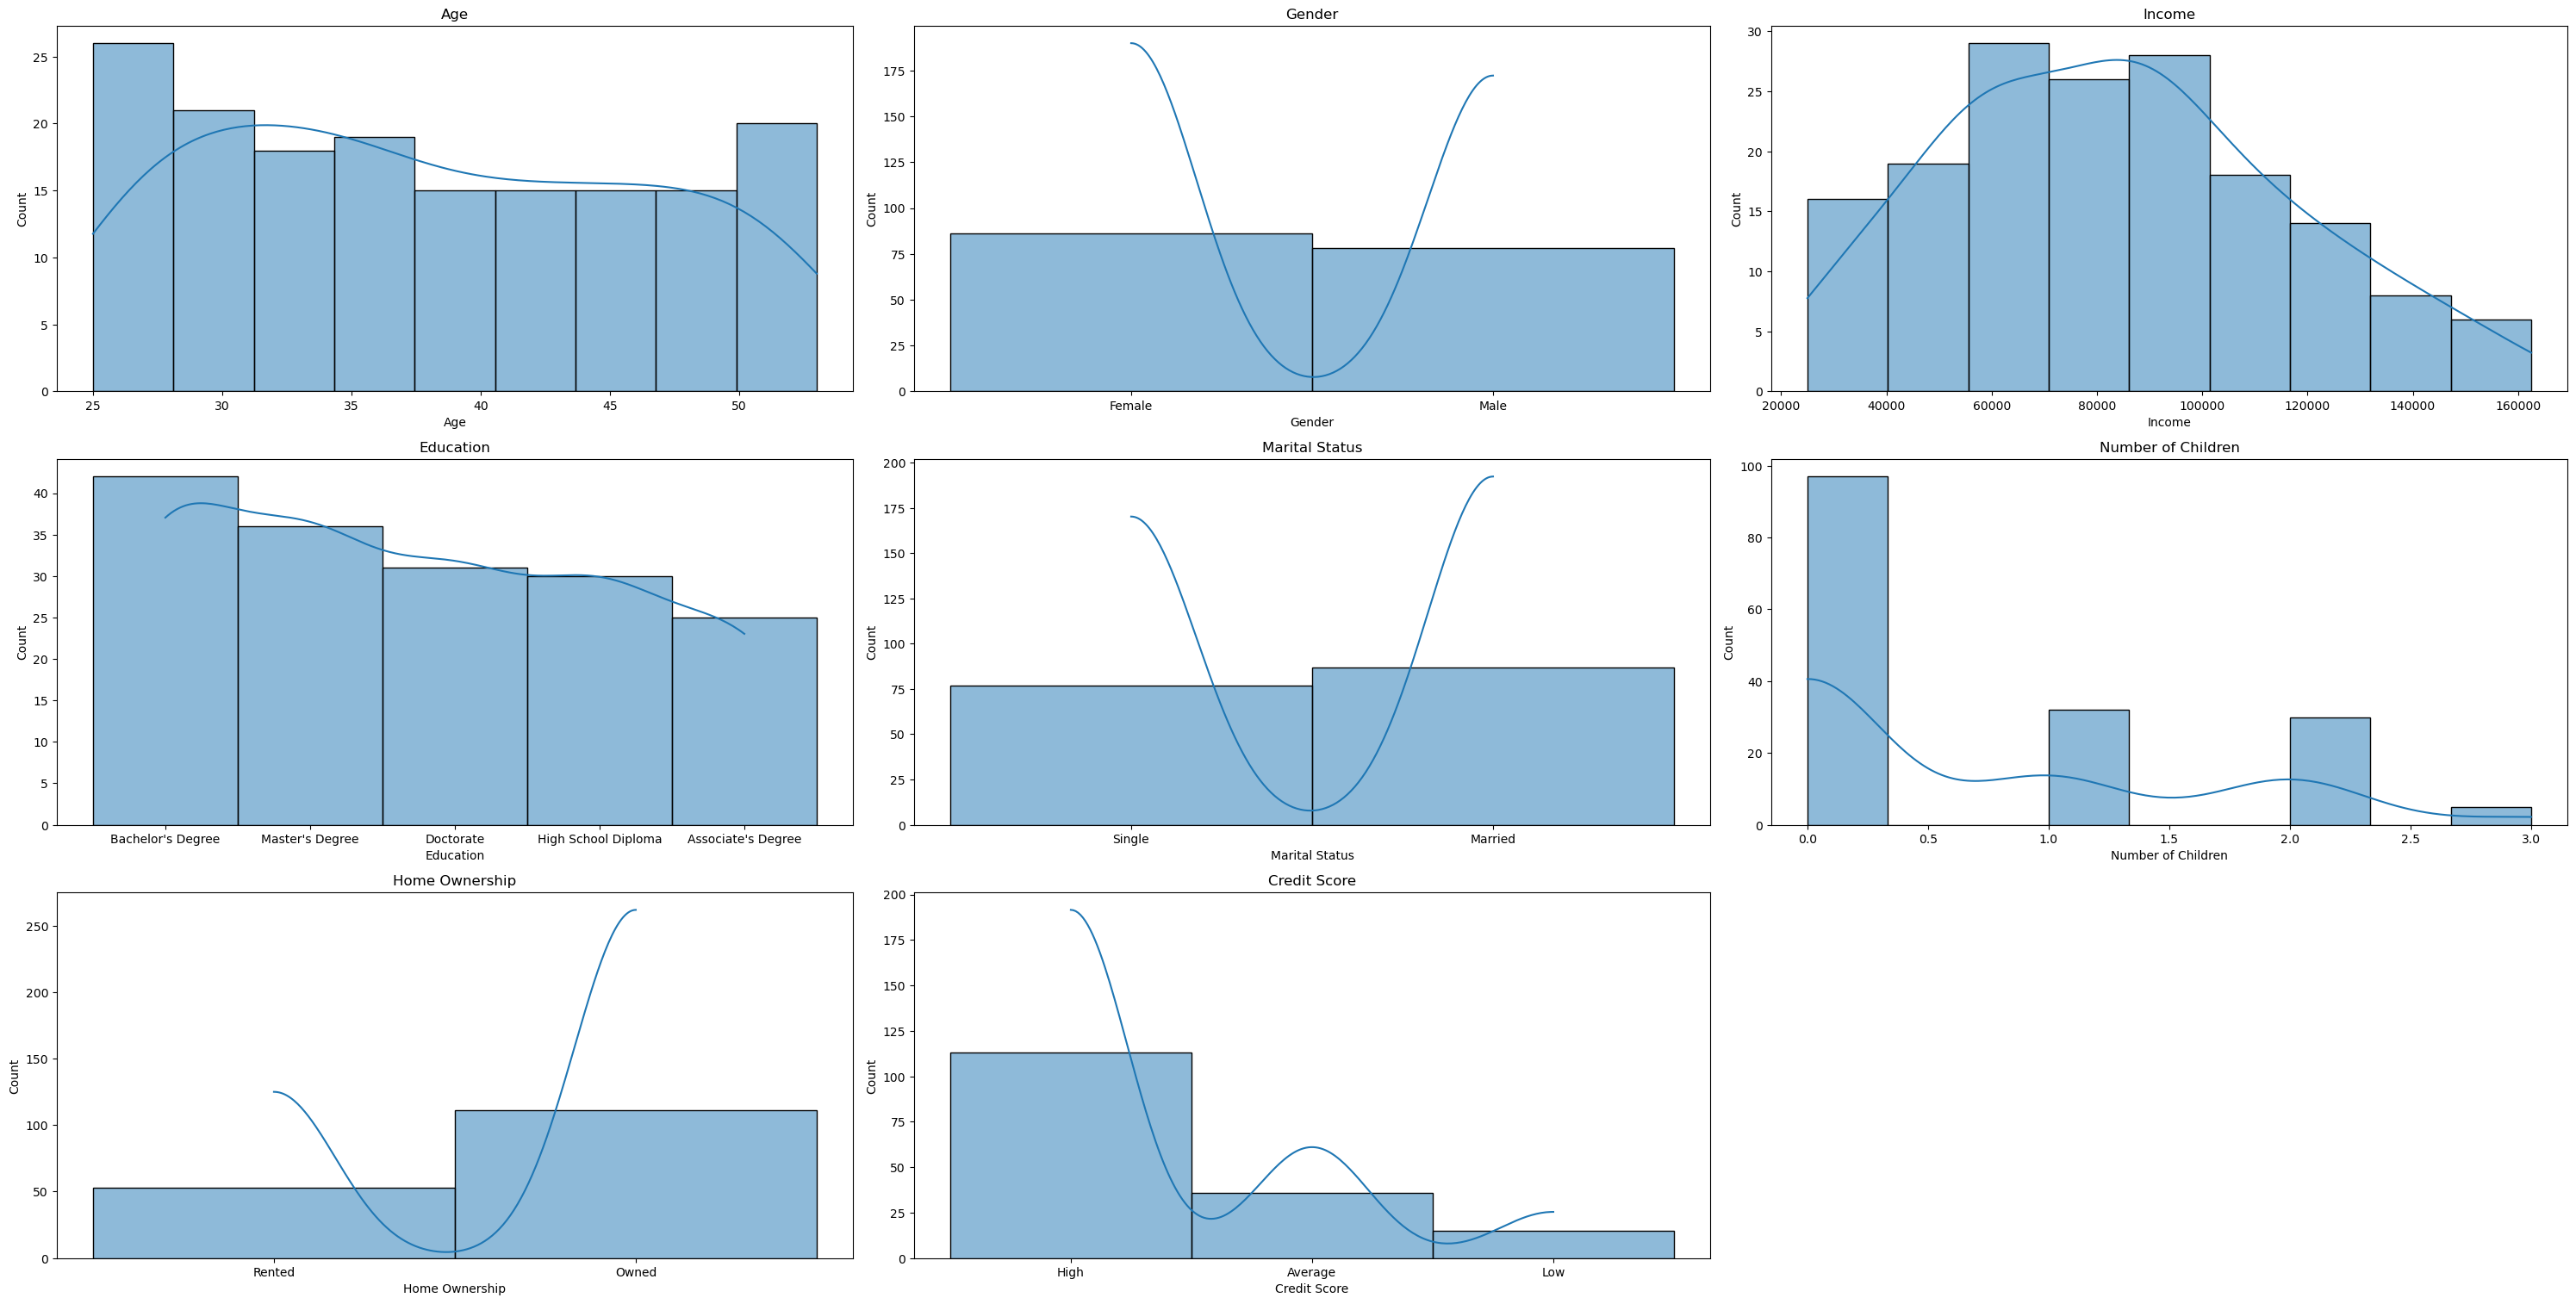

In [352]:
features = df.columns.tolist()  

plt.figure(figsize=(30, 45)) 

for i in range(min(20, len(features))): 
    plt.subplot(9, 3, i + 1)  
    sns.histplot(data=df, x=features[i], kde=True)
    plt.title(features[i])  

plt.tight_layout()  
plt.show()

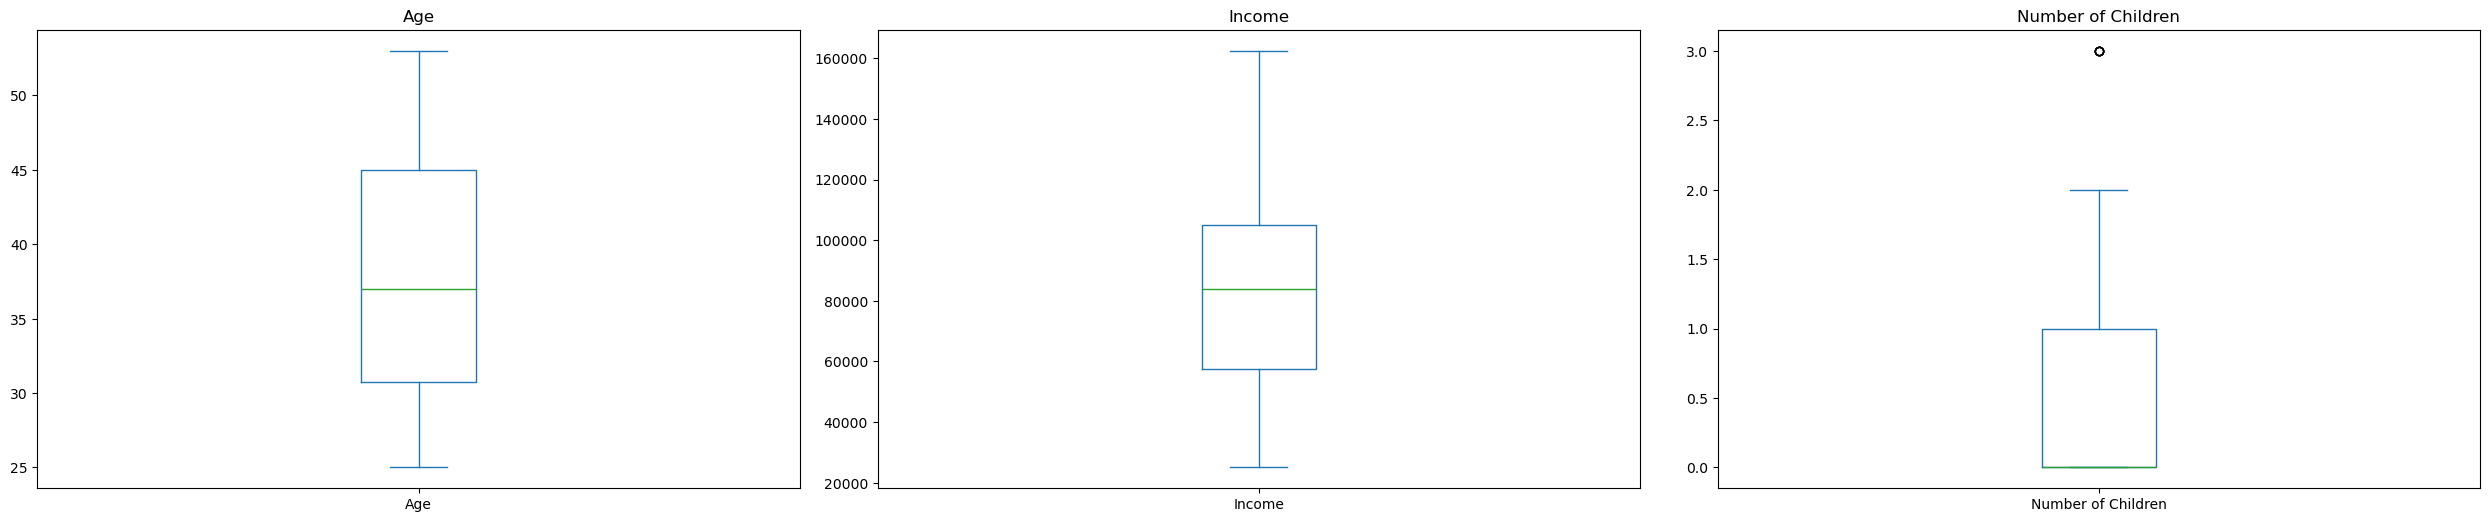

In [353]:
integer_columns = df.select_dtypes(include=['int64']).columns.tolist()

columns_to_plot = integer_columns[:12]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20)) 
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    df[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [354]:
X = df.drop(columns=["Credit Score"])
y = df["Credit Score"]

In [355]:
X

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,50000,Bachelor's Degree,Single,0,Rented
1,30,Male,100000,Master's Degree,Married,2,Owned
2,35,Female,75000,Doctorate,Married,1,Owned
3,40,Male,125000,High School Diploma,Single,0,Owned
4,45,Female,100000,Bachelor's Degree,Married,3,Owned
...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented
160,34,Male,47500,Associate's Degree,Single,0,Rented
161,39,Female,62500,Bachelor's Degree,Married,2,Owned
162,44,Male,87500,Master's Degree,Single,0,Owned


In [360]:
y

0         High
1         High
2         High
3         High
4         High
        ...   
159        Low
160    Average
161       High
162       High
163       High
Name: Credit Score, Length: 164, dtype: object

In [362]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15, stratify=y
)

In [364]:
print("Original 'Credit Score' values:")
print(df["Credit Score"].value_counts())

Original 'Credit Score' values:
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


In [366]:
credit_score_map = {"Low": 0, "Average": 1, "High": 2}  # Manual mapping

y_train = y_train.map(credit_score_map)
y_test = y_test.map(credit_score_map)

# Check
print("Encoded y_train:\n", y_train.value_counts())

Encoded y_train:
 Credit Score
2    90
1    29
0    12
Name: count, dtype: int64


In [368]:
print("Encoded 'Credit Score' in y_train:")
print(y_train.value_counts())

Encoded 'Credit Score' in y_train:
Credit Score
2    90
1    29
0    12
Name: count, dtype: int64


In [370]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.utils import class_weight

pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder(
        variables=["Education"],
        encoding_method="ordered"
    )),
    ("onehot_encoder", OneHotEncoder(variables=["Gender", "Home Ownership", "Marital Status"])),
    
    # XGBoost with class weighting
    ("classifier", XGBClassifier(n_estimators=200, max_depth=4))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('ordinal_encoder', OrdinalEncoder(variables=['Education'])),
                ('onehot_encoder',
                 OneHotEncoder(variables=['Gender', 'Home Ownership',
                                          'Marital Status'])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_ca...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [372]:
y_pred= pipeline.predict(X_test)

In [374]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report)

val_accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("\nClass-wise Metrics:")
for i, class_name in enumerate(["Low", "Average", "High"]):
    print(f"{class_name}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-score: {f1[i]:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Average", "High"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Validation Accuracy: 0.9394

Class-wise Metrics:
Low:
  Precision: 0.7500
  Recall: 1.0000
  F1-score: 0.8571

Average:
  Precision: 1.0000
  Recall: 0.7143
  F1-score: 0.8333

High:
  Precision: 0.9583
  Recall: 1.0000
  F1-score: 0.9787

Classification Report:
              precision    recall  f1-score   support

         Low       0.75      1.00      0.86         3
     Average       1.00      0.71      0.83         7
        High       0.96      1.00      0.98        23

    accuracy                           0.94        33
   macro avg       0.90      0.90      0.89        33
weighted avg       0.95      0.94      0.94        33


Confusion Matrix:
[[ 3  0  0]
 [ 1  5  1]
 [ 0  0 23]]


In [376]:
import joblib

# Save the pipeline
joblib.dump(pipeline, "credit_score_pipeline.pkl")

['credit_score_pipeline.pkl']